# BME3053C - Computer Applications for BME

<br/>

<h1 align="center">Supervised Machine Learning</h1>

---

<center><h2>Lesson: 09</h2></center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/bme3053c/blob/main/lessons/09_Supervised_Machine_Learning.ipynb)

## Before We Begin!

#### Here are some plotting libraries that we'll use in this notebook:


### Plotly
[Plotly](https://plotly.com/python/) is a powerful interactive visualization library that allows us to create publication-quality plots, including complex 3D visualizations. Some key advantages of Plotly include:

- **Interactive Features**: Plots can be zoomed, panned, and rotated
- **Export Options**: Figures can be saved as static images or interactive HTML files
- **Wide Range of Plot Types**: Supports various chart types from basic to advanced visualizations
- **Customization**: Extensive options for styling and formatting

### Seaborn
[Seaborn](https://seaborn.pydata.org/) is a statistical data visualization library built on top of matplotlib. It offers several advantages:
- **Statistical Plotting**: Built-in support for statistical visualizations
- **Beautiful Defaults**: Aesthetically pleasing default styles
- **Integration**: Works seamlessly with pandas DataFrames
- **Complex Visualizations**: Easy creation of complex plots like heatmaps and pair plots

In [1]:
# Check and install required packages if needed
try:
    import nbformat
    import plotly
    import seaborn as sns
    import sklearn
except ImportError:
    print("Installing required packages...")
    !pip install -U nbformat
    !pip install plotly
    !pip install seaborn
    !pip install scikit-learn
# Import statements
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd



---
#### *If any of the above imports fail, please restart the kernel and run the cell above again.*
---


## Introduction to Supervised Machine Learning

Supervised machine learning is a type of machine learning where a model learns from labeled training data to make predictions or decisions based on new data. In supervised learning, each training sample comes with an input (features) and a known output (label), allowing the model to "supervise" itself by learning the relationship between inputs and outputs. The goal is to make accurate predictions on unseen data.

### Key Concepts

1. **Features**: These are the measurable properties or characteristics of the data, also known as "independent variables." For instance, in a medical dataset, features might include age, blood pressure, or cholesterol levels.

2. **Labels**: Labels are the outcomes we want the model to predict. In medical diagnostics, the label could be the presence or absence of a disease.

3. **Model**: This is the algorithm that will learn the relationship between features and labels from the training data and make predictions on new data.

4. **Learning Algorithm**: This is the method used to adjust the model's parameters so that it can accurately predict the label for a given set of features. Examples include Decision Trees, Support Vector Machines, and Neural Networks.

### Types of Supervised Learning Problems

- **Classification**: In classification problems, the model learns to predict discrete categories. For example, determining whether an X-ray shows signs of pneumonia or not.
- **Regression**: In regression problems, the model predicts continuous values. For example, estimating a patient's blood pressure based on other health metrics.

### Real-World Applications of Supervised Machine Learning in Biomedical Engineering

Supervised learning plays a critical role in advancing biomedical engineering by enhancing diagnostics, treatment, and research. Here are some applications:

- **Medical Imaging**: Identifying tumors, fractures, or lesions in MRI, CT, and X-ray images using classification models.
- **Genomics**: Predicting the likelihood of genetic diseases by analyzing DNA sequences and identifying genetic markers.
- **ECG and Heart Rate Monitoring**: Detecting arrhythmias or abnormalities in heart rate data by classifying ECG waveforms.
- **Drug Discovery**: Predicting molecular properties to identify potential new drugs, using both classification and regression models to assess efficacy and safety.
- **Wearable Health Monitoring**: Analyzing data from wearable sensors to detect health conditions (e.g., blood glucose levels, oxygen saturation), providing early warnings for critical conditions.

Each application requires high accuracy and robustness, which often involves the use of domain-specific features and careful evaluation to ensure reliable results.

### How Supervised Learning Works

The supervised learning process involves several steps:

1. **Data Collection**: Collect a dataset with input-output pairs (features and labels).
2. **Data Preprocessing**: Clean and prepare the data by handling missing values, scaling features, and encoding categorical variables.
3. **Model Training**: Train the model using the labeled data, allowing it to adjust its parameters based on patterns it identifies.
4. **Evaluation**: Evaluate the model's accuracy on new, unseen data using metrics suited to the problem type.
5. **Deployment**: Once a model performs well, it can be deployed to make predictions on real-world data.

Supervised learning has countless applications, especially in fields like healthcare, where predicting outcomes can help make better-informed clinical decisions.

### Benefits of Supervised Machine Learning

Supervised learning is a powerful approach that enables computers to learn complex patterns in data. This method has several benefits, especially in applications where predictions can lead to more efficient processes and better decision-making.
1. **High Accuracy in Predictive Tasks**
  * Supervised learning models are trained on labeled data, which allows them to achieve high accuracy when predicting outcomes. When given a comprehensive and representative dataset, these models can make reliable predictions.
    * **Example**: In healthcare, a supervised learning model trained on patient medical records and diagnostic tests can accurately diagnose diseases, reducing the risk of human error and assisting clinicians in making quicker, data-driven decisions.
2. **Ability to Handle Complex Data**

  * Supervised learning algorithms can manage both structured and unstructured data, such as images, text, or sensor data. This flexibility makes them suitable for complex tasks where different types of data need to be integrated.
    * **Example**: In biomedical engineering, supervised models can analyze MRI and CT images to detect abnormalities. These models identify features in high-dimensional data that might not be immediately visible to the human eye.

1. **Scalability for Large Datasets**

  * As data grows, supervised models can scale with it, continually improving their performance with additional labeled data. This scalability is valuable in fields where data accumulates quickly, such as genomics or wearable health monitoring.
    * **Example**: For wearable devices that collect real-time health data (e.g., heart rate, sleep patterns), supervised models can analyze trends and provide health insights on a large scale, benefiting from continuous data input to refine predictions.

4. **Personalization and Adaptability**

  * Supervised learning models can be customized for specific tasks and adapted to changes in data distribution. This adaptability allows for the development of personalized predictions and recommendations.
    * **Example**: Personalized medicine benefits from supervised learning, as models can be tailored to predict how individual patients might respond to different treatments, leading to more effective and targeted care.

5. **Reduction of Human Error**

  * Automated prediction reduces human bias and error in decision-making. Supervised learning models follow objective patterns learned from data, providing a more consistent approach than subjective human interpretation.
    * **Example**: In diagnostics, using supervised models for image analysis reduces reliance on human interpretation, ensuring that critical details are consistently considered, especially in high-stakes environments like ICU settings.

6. **Efficient Processing of Large Volumes of Data**

  * Supervised learning algorithms can process large volumes of data rapidly, making it possible to analyze and draw conclusions in real-time. This ability is essential in fields that require timely decision-making.
    * **Example**: In ICU settings, supervised models can analyze continuous patient data (e.g., heart rate, oxygen levels) in real-time to detect anomalies and alert clinicians to potential issues before they become critical.

## Classification in Biomedical Engineering

Classification is a supervised learning task where the model predicts a discrete label (category) for each input.

### Examples in Biomedical Engineering
- **Disease Diagnosis**: Classifying whether a patient has a particular disease (e.g., cancer, diabetes) based on diagnostic tests and medical history.
- **Image Analysis**: Identifying types of cells in microscopy images, such as cancerous vs. non-cancerous cells.
- **ECG Analysis**: Detecting arrhythmias or classifying heartbeats into normal and abnormal classes.

### Common Evaluation Metrics for Classification
- **Confusion Matrix**: A matrix showing true vs. predicted classes, helpful for understanding misclassifications.
  - **TN (True Negatives)**: Cases correctly predicted as negative
  - **TP (True Positives)**: Cases correctly predicted as positive  
  - **FN (False Negatives)**: Cases incorrectly predicted as negative
  - **FP (False Positives)**: Cases incorrectly predicted as positive


<center><image src="https://github.com/uf-bme/bme3053c/raw/main/files/confusion_matrix.png" height="300"/></center>


- **Accuracy**: The proportion of correctly classified samples.



$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

- **Precision and Recall**: 
  - **Precision**: The proportion of positive predictions that are actually correct. It answers the question "Of all cases we predicted as positive, what fraction were truly positive?"
    - $Precision = \frac{TP}{TP + FP}$
  - **Recall**: The proportion of actual positive cases that were correctly identified. It answers the question "Of all the actual positive cases, what fraction did we catch?"
    - $Recall = \frac{TP}{TP + FN}$
  - In medical contexts, high precision means fewer false alarms, while high recall means fewer missed diagnoses.

<center><image src="https://github.com/uf-bme/bme3053c/raw/main/files/Precisionrecall.svg.png" height="500"/></center>


- **F1 Score**: The harmonic mean of precision and recall, useful for imbalanced classes.

$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$


In biomedical applications, high accuracy and recall are often critical, as false negatives (missed cases) could have serious consequences.

Test A (High Precision):
Precision: 0.91 - Of all positive predictions, 90.9% were correct
Recall: 0.40 - Caught 40.0% of all actual disease cases
Accuracy: 0.97 - 96.8% of all predictions were correct
F1 Score: 0.56

Test B (High Recall):
Precision: 0.39 - Of all positive predictions, 39.1% were correct
Recall: 0.90 - Caught 90.0% of all actual disease cases
Accuracy: 0.93 - 92.5% of all predictions were correct
F1 Score: 0.55


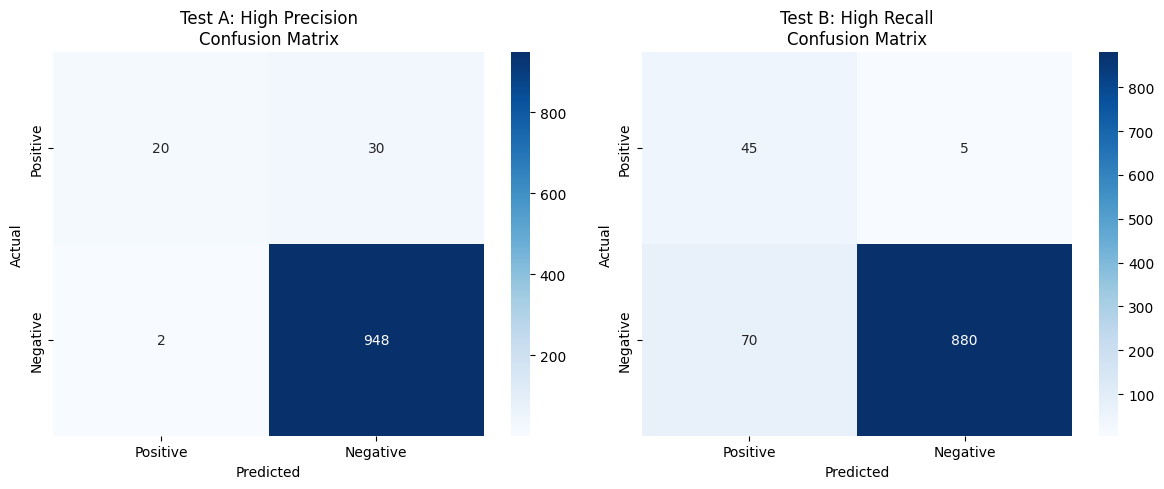


Discussion Question:
In a medical context, which test would you prefer and why?
Consider: Test A misses more cases but has fewer false alarms
          Test B catches more cases but has more false alarms


In [2]:
# Simulate a medical test for a rare disease
np.random.seed(42)

# Generate ground truth - 1000 patients, 5% have the disease
n_patients = 1000
n_positive = 50  # 5% disease prevalence
true_labels = np.array([1]*n_positive + [0]*(n_patients-n_positive))

# Simulating two different medical tests
# Test A: High Precision, Lower Recall

test_A = np.array([1]*20 + [0] * 48 + [1] * 2 + [0]*(n_patients-70))  # Very few false positives

# Test B: High Recall, Lower Precision 
test_B = np.array([1]*45 + [0]*5 + [1]*70 + [0]*(n_patients-120))  # Catches most positives but more false positives

# Calculate metrics
precision_A = precision_score(true_labels, test_A)
recall_A = recall_score(true_labels, test_A)
accuracy_A = accuracy_score(true_labels, test_A)
f1_A = f1_score(true_labels, test_A)

precision_B = precision_score(true_labels, test_B)
recall_B = recall_score(true_labels, test_B)
accuracy_B = accuracy_score(true_labels, test_B)
f1_B = f1_score(true_labels, test_B)

print("Test A (High Precision):")
print(f"Precision: {precision_A:.2f} - Of all positive predictions, {precision_A*100:.1f}% were correct")
print(f"Recall: {recall_A:.2f} - Caught {recall_A*100:.1f}% of all actual disease cases")
print(f"Accuracy: {accuracy_A:.2f} - {accuracy_A*100:.1f}% of all predictions were correct")
print(f"F1 Score: {f1_A:.2f}")
print("\nTest B (High Recall):")
print(f"Precision: {precision_B:.2f} - Of all positive predictions, {precision_B*100:.1f}% were correct")
print(f"Recall: {recall_B:.2f} - Caught {recall_B*100:.1f}% of all actual disease cases")
print(f"Accuracy: {accuracy_B:.2f} - {accuracy_B*100:.1f}% of all predictions were correct")
print(f"F1 Score: {f1_B:.2f}")

# Visualize confusion matrices using seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

conf_matrix_A = confusion_matrix(true_labels, test_A)
conf_matrix_B = confusion_matrix(true_labels, test_B)

# Flip the matrices to put TP in upper left and TN in lower right
conf_matrix_A = np.flip(conf_matrix_A, axis=(0,1))
conf_matrix_B = np.flip(conf_matrix_B, axis=(0,1))

# Plot matrices using seaborn heatmap
sns.heatmap(conf_matrix_A, annot=True, fmt='d', cmap='Blues', ax=ax1, 
            xticklabels=['Positive', 'Negative'], 
            yticklabels=['Positive', 'Negative'])
sns.heatmap(conf_matrix_B, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Positive', 'Negative'], 
            yticklabels=['Positive', 'Negative'])

ax1.set_title('Test A: High Precision\nConfusion Matrix')
ax2.set_title('Test B: High Recall\nConfusion Matrix')

for ax in [ax1, ax2]:
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    
plt.tight_layout()
plt.show()

print("\nDiscussion Question:")
print("In a medical context, which test would you prefer and why?")
print("Consider: Test A misses more cases but has fewer false alarms")
print("          Test B catches more cases but has more false alarms")


## Regression in Biomedical Engineering

Regression is a supervised learning task where the model predicts a continuous outcome or value.

### Examples in Biomedical Engineering
- **Predicting Blood Glucose Levels**: Estimating future blood glucose levels for diabetes management based on past readings and factors like diet and exercise.
- **Drug Dosage Prediction**: Calculating personalized drug dosages for patients based on their physiological data and medication response.
- **Bone Density Estimation**: Predicting bone density values from X-ray images to assess the risk of osteoporosis.

### Common Evaluation Metrics for Regression
- **Mean Squared Error (MSE)**: Measures the average squared differences between predicted and actual values.
  - $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{pred} - y_{true})^2$
- **Mean Absolute Error (MAE)**: The average of absolute errors, providing an intuitive measure of prediction accuracy.
  - $MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{pred} - y_{true}|$
- **R² Score**: Indicates how well the model explains the variability of the data; values closer to 1 show a better fit.
  - $R² = 1 - \frac{\sum_{i=1}^{n} (y_{true} - y_{pred})^2}{\sum_{i=1}^{n} (y_{true} - y_{mean})^2}$

In biomedical contexts, regression accuracy is essential for providing reliable, personalized predictions that inform critical health decisions.

### ✏️ **Exercise**  
1. Identify whether the following problems are classification or regression:
   - Predicting a person's heart rate
   - Determining if an email is spam or not
   - Estimating a person's age from a photo
   - Categorizing news articles by topic

## The Supervised Learning Process

### 1. Data Collection

The first step in supervised learning is gathering a dataset that includes both inputs (features) and known outputs (labels). The quality and size of the dataset directly impact the model's accuracy and generalizability.

- **Example**: In the [Iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset), we want to predict the species of iris flowers. We collect a dataset that includes features like **sepal length**, **sepal width**, **petal length**, and **petal width**. The label would be the iris species (`setosa`, `versicolor`, or `virginica`).

- **Key Points**:
  - **Diversity**: Ensure data represents the population the model will serve to avoid biases.
  - **Size**: Larger datasets often help the model generalize better but require more computational power.

In [3]:
# Load a sample dataset
from sklearn.datasets import load_iris
iris = load_iris()
df_raw = pd.DataFrame(iris.data, columns=iris.feature_names)
df_raw['target'] = iris.target


In [4]:
# Let's visualize the Iris dataset in 3D plots showing different feature combinations

# Create a mapping of target numbers to class names
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_raw['target_name'] = df_raw['target'].map(target_names)

# Create figure with two 3D subplots side by side
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=('Iris Dataset: Sepal Length vs Width vs Petal Length',
                   'Iris Dataset: Petal Length vs Width vs Sepal Length'),
    horizontal_spacing=0.05  # Reduced from 0.1
)

# First subplot: sepal length vs sepal width vs petal length
fig.add_trace(
    go.Scatter3d(
        x=df_raw['sepal length (cm)'],
        y=df_raw['sepal width (cm)'],
        z=df_raw['petal length (cm)'],
        mode='markers',
        marker=dict(
            size=4,
            color=df_raw['target'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(
                title='Species',
                ticktext=list(target_names.values()),
                tickvals=list(target_names.keys())
            )
        ),
        text=df_raw['target_name'],  # Add hover text
        hovertemplate='<br>'.join([
            'Sepal Length: %{x}',
            'Sepal Width: %{y}',
            'Petal Length: %{z}',
            'Species: %{text}'
        ]),
        showlegend=False
    ),
    row=1, col=1
)

# Second subplot: petal length vs petal width vs sepal length
fig.add_trace(
    go.Scatter3d(
        x=df_raw['petal length (cm)'],
        y=df_raw['petal width (cm)'],
        z=df_raw['sepal length (cm)'],
        mode='markers',
        marker=dict(
            size=4,
            color=df_raw['target'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(
                title='Species',
                ticktext=list(target_names.values()),
                tickvals=list(target_names.keys())
            )
        ),
        text=df_raw['target_name'],  # Add hover text
        hovertemplate='<br>'.join([
            'Petal Length: %{x}',
            'Petal Width: %{y}',
            'Sepal Length: %{z}',
            'Species: %{text}'
        ]),
        showlegend=False
    ),
    row=1, col=2
)

# Update axis labels for both scenes
fig.update_layout(
    scene=dict(
        xaxis_title='Sepal Length (cm)',
        yaxis_title='Sepal Width (cm)',
        zaxis_title='Petal Length (cm)',
        camera=dict(
            eye=dict(x=2, y=2, z=2)  # Increased distance from the plot
        )
    ),
    scene2=dict(
        xaxis_title='Petal Length (cm)', 
        yaxis_title='Petal Width (cm)',
        zaxis_title='Sepal Length (cm)',
        camera=dict(
            eye=dict(x=2, y=2, z=2)  # Increased distance from the plot
        )
    ),
    width=1200,
    height=400,  # Increased height
    margin=dict(l=0, r=0, t=30, b=0)  # Reduced margins around the plot
)

fig.show()


### 2. Data Preprocessing

Raw data often contains inconsistencies, missing values, or irrelevant features. Preprocessing cleans and prepares data to improve model performance and accuracy.

- **Common Steps**:
  - **Handling Missing Values**: For example, filling in missing age values by the mean or median.
  - **Feature Scaling**: Normalizing features like blood pressure to fall within a similar range can help models converge faster and perform more consistently.
  - **Encoding Categorical Variables**: Converting non-numeric features (e.g., `male/female`) into numeric form so the model can process them.

- **Example**: For the Iris dataset, if we have a categorical feature like species (`setosa/versicolor/virginica`), we might convert it using one-hot encoding to create three binary columns, where a `1` indicates the flower belongs to that species.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Scaling numerical features
scaler = StandardScaler()
df = df_raw.copy()
df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])
# print(df.head())


# Select top 2 features
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(df[iris.feature_names], df['target'])
selected_features = df[iris.feature_names].columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['petal length (cm)', 'petal width (cm)']


In [6]:
# Let's visualize the Iris dataset in 3D plots showing different feature combinations

# Create a mapping of target numbers to class names
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['target_name'] = df['target'].map(target_names)

# Create figure with two 3D subplots side by side
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=('Iris Dataset: Sepal Length vs Width vs Petal Length',
                   'Iris Dataset: Petal Length vs Width vs Sepal Length'),
    horizontal_spacing=0.05  # Reduced from 0.1
)

# First subplot: sepal length vs sepal width vs petal length
fig.add_trace(
    go.Scatter3d(
        x=df['sepal length (cm)'],
        y=df['sepal width (cm)'],
        z=df['petal length (cm)'],
        mode='markers',
        marker=dict(
            size=4,
            color=df['target'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(
                title='Species',
                ticktext=list(target_names.values()),
                tickvals=list(target_names.keys())
            )
        ),
        text=df['target_name'],  # Add hover text
        hovertemplate='<br>'.join([
            'Sepal Length: %{x}',
            'Sepal Width: %{y}',
            'Petal Length: %{z}',
            'Species: %{text}'
        ]),
        showlegend=False
    ),
    row=1, col=1
)

# Second subplot: petal length vs petal width vs sepal length
fig.add_trace(
    go.Scatter3d(
        x=df['petal length (cm)'],
        y=df['petal width (cm)'],
        z=df['sepal length (cm)'],
        mode='markers',
        marker=dict(
            size=4,
            color=df['target'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(
                title='Species',
                ticktext=list(target_names.values()),
                tickvals=list(target_names.keys())
            )
        ),
        text=df['target_name'],  # Add hover text
        hovertemplate='<br>'.join([
            'Petal Length: %{x}',
            'Petal Width: %{y}',
            'Sepal Length: %{z}',
            'Species: %{text}'
        ]),
        showlegend=False
    ),
    row=1, col=2
)

# Update axis labels for both scenes
fig.update_layout(
    scene=dict(
        xaxis_title='Sepal Length (cm)',
        yaxis_title='Sepal Width (cm)',
        zaxis_title='Petal Length (cm)',
        camera=dict(
            eye=dict(x=2, y=2, z=2)  # Increased distance from the plot
        )
    ),
    scene2=dict(
        xaxis_title='Petal Length (cm)', 
        yaxis_title='Petal Width (cm)',
        zaxis_title='Sepal Length (cm)',
        camera=dict(
            eye=dict(x=2, y=2, z=2)  # Increased distance from the plot
        )
    ),
    width=1200,
    height=400,  # Increased height
    margin=dict(l=0, r=0, t=30, b=0)  # Reduced margins around the plot
)

fig.show()



### 3. Model Training

Training a model means feeding it with the labeled dataset so it can learn the patterns that link the features to the labels. In this phase, the model adjusts its internal parameters to minimize prediction errors on the training data.

- **How It Works**:
  - **Training Set**: A portion of the dataset (e.g., 70-80%) is used to train the model.
  - **Validation Set**: Another portion (e.g., 10-15%) is used to fine-tune the model’s hyperparameters.
  - **Testing Set**: The remaining data (e.g., 10-15%) is set aside to evaluate the model’s final performance.

- **Example**: For iris flower classification, we could use a **Logistic Regression** model (a commonly used classifier) to identify relationships between features (e.g., petal length and width) and the probability of a flower belonging to each iris species.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Prepare data
X = df[iris.feature_names]
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()


### 4. Evaluation

Evaluating a model’s performance is essential to ensure it generalizes well to new data. The choice of evaluation metrics depends on the type of problem.

- **Example**: In the iris classification model, we might check accuracy to see how well we identify flower species overall, and precision/recall to ensure we're correctly identifying each individual species without mixing them up.

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 5. Model Deployment

After a model achieves satisfactory performance, it can be deployed to make predictions on real-world data. Deployment may involve integrating the model into applications, such as web apps, mobile apps, or even wearable devices.

- **Options for Deployment**:
  - **Cloud Deployment**: Using cloud services like AWS SageMaker or Google Cloud AI for scalability and accessibility.
  - **Edge Deployment**: Deploying on edge devices, like mobile phones or IoT devices, which can be helpful for wearable health monitoring.

- **Example**: A deployed iris classification model could be integrated into a botanical garden's mobile app, where it helps visitors identify iris species by taking photos and analyzing the flower's measurements in real-time.

### ✏️**Exercise**: Parkinson's Disease Classification

In this exercise, you'll work with a real medical dataset from OpenML to predict Parkinson's disease based on various biomedical voice measurements. The dataset contains voice recordings from 31 people, 23 with Parkinson's disease.
**Tasks:**
1. Explore the Parkinson's dataset that we've loaded using `fetch_openml`
2. Preprocess the data:
   - Split into training and test sets
   - Scale the features using StandardScaler
3. Train and evaluate two models:
   - Logistic Regression
   - MLPClassifier (Neural Network)
4. Compare the performance of both models using:
   - Accuracy
   - Classification report (precision, recall, f1-score)
5. Bonus: Try tuning the hyperparameters of the MLPClassifier to improve performance


In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Load Parkinson's dataset
# This might take a moment to download
X, y = fetch_openml(data_id=1488, return_X_y=True, as_frame=True)
print(f"Dataset shape: {X.shape}")
print(f"Features: {X.columns.tolist()}")

Dataset shape: (195, 22)
Features: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22']


In [13]:
# Load data
X, y = fetch_openml(data_id=1488, return_X_y=True, as_frame=True)

# Create scatter plots of first few features using plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=X.columns[:4])

# Plot first 4 features against each other
features = X.columns[:4]
colors = y.astype('category').cat.codes

for i in range(2):
    for j in range(2):
        idx = i*2 + j
        fig.add_trace(
            go.Scatter(x=X[features[idx]], 
                      y=X[features[(idx+1)%4]], 
                      mode='markers',
                      marker=dict(color=colors, colorscale='Viridis'),
                      showlegend=False),
            row=i+1, col=j+1
        )
        # Update y-axis title for each subplot
        fig.update_yaxes(title_text=features[(idx+1)%4], row=i+1, col=j+1)
        
fig.update_layout(height=600, width=750, title_text="Parkinson's Disease Features Visualization")
fig.show()


#### 2. Data Preprocessing

* Since our features are on different scales, we need to standardize them to ensure each feature contributes equally to the model. We'll use StandardScaler to transform the features to have zero mean and unit variance.
* Split the data into training and test sets, with an 80/20 split.


In [12]:
# Preprocess the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### 3. Train two models:
 - [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
   - check out this interactive [demo](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4&seed=0.91282&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to learn more about  MLPs (also known as Neural Networks)

#### 4. Compare the performance of both models using:
* Report the f1-score, precision, and recall for each model.
* Plot the confusion matrix and f1 score for each model.


Logistic Regression Results:
------------------------------
Accuracy: 0.897

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.43      0.60         7
           2       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



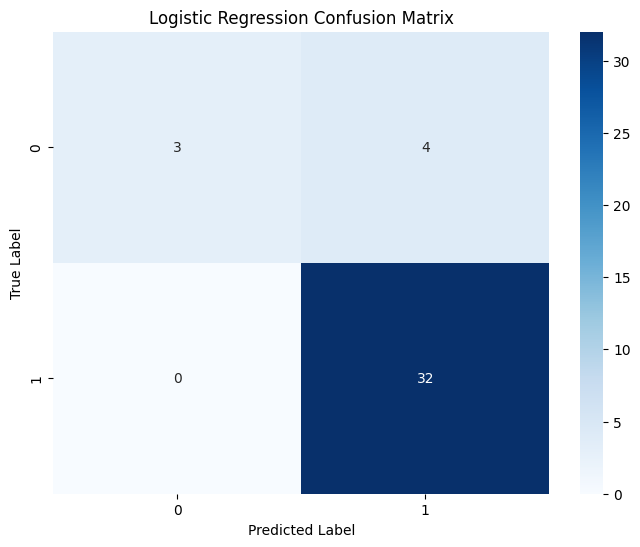

In [21]:
# Train and evaluate the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

# Print evaluation metrics
print("Logistic Regression Results:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# Create confusion matrix visualization
conf_matrix = confusion_matrix(y_test, lr_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
# Train and evaluate a Multi-Layer Perceptron (Neural Network)


Multi-Layer Perceptron Results:
------------------------------
Accuracy: 0.846

Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.43      0.50         7
           2       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



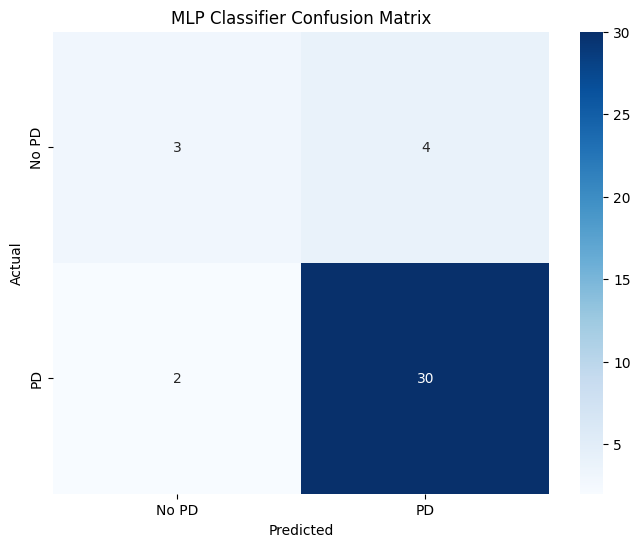

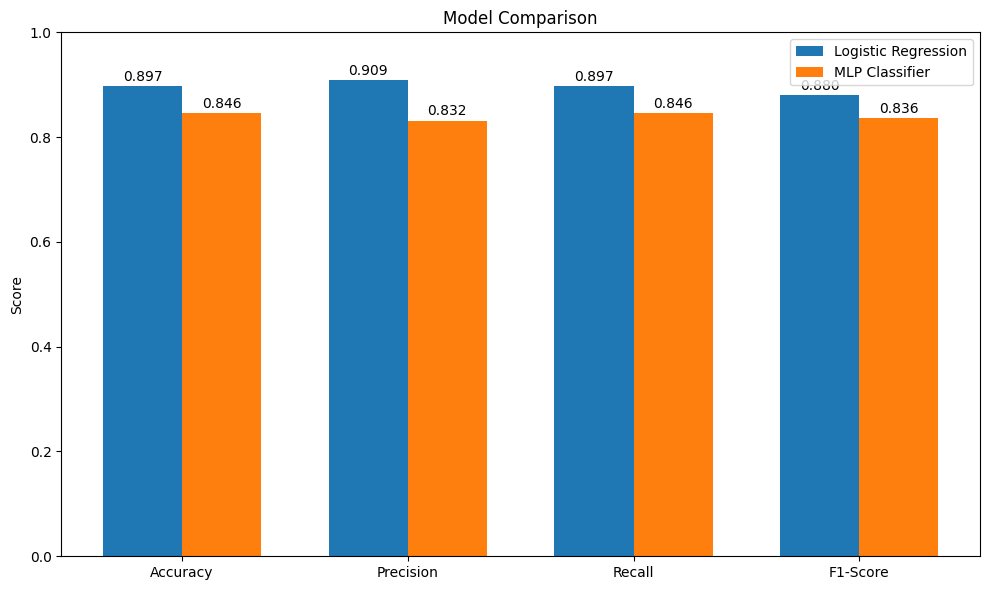

In [17]:
# Train and evaluate the Multi-Layer Perceptron classifier
from sklearn.neural_network import MLPClassifier

# Initialize the MLP with a simple architecture
# - hidden_layer_sizes=(100, 50) means 2 hidden layers with 100 and 50 neurons respectively
# - max_iter increased to ensure convergence
# - early_stopping helps prevent overfitting
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
mlp_pred = mlp_model.predict(X_test)

# Print evaluation metrics
print("Multi-Layer Perceptron Results:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, mlp_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, mlp_pred))

# Create confusion matrix visualization
conf_matrix = confusion_matrix(y_test, mlp_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No PD', 'PD'],
            yticklabels=['No PD', 'PD'])
plt.title('MLP Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compare with Logistic Regression results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [
    accuracy_score(y_test, lr_pred),
    precision_score(y_test, lr_pred, average='weighted'),
    recall_score(y_test, lr_pred, average='weighted'),
    f1_score(y_test, lr_pred, average='weighted')
]
mlp_scores = [
    accuracy_score(y_test, mlp_pred),
    precision_score(y_test, mlp_pred, average='weighted'),
    recall_score(y_test, mlp_pred, average='weighted'),
    f1_score(y_test, mlp_pred, average='weighted')
]

# Create comparison plot
plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, lr_scores, width, label='Logistic Regression')
plt.bar(x + width/2, mlp_scores, width, label='MLP Classifier')

plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

# Add value labels on top of each bar
for i, v in enumerate(lr_scores):
    plt.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center')
for i, v in enumerate(mlp_scores):
    plt.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

In [15]:
#Bonus: Try tuning the hyperparameters of the MLPClassifier to improve performance!


Starting grid search - this may take a few minutes...

Best parameters found:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 1000}

Best cross-validation score: 0.815

Optimized MLP Results:
------------------------------
Accuracy: 0.949

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



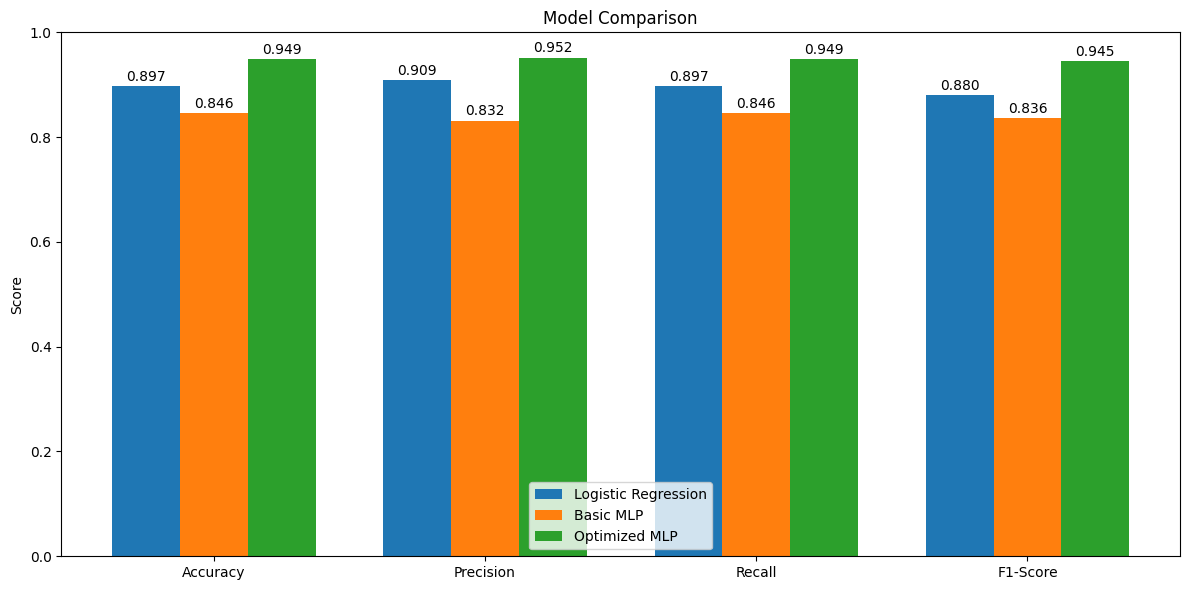

In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000]
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42, early_stopping=True)

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    mlp, 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='f1_weighted',
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search
print("Starting grid search - this may take a few minutes...")
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"\nBest cross-validation score: {grid_search.best_score_:.3f}")

# Train final model with best parameters
best_mlp = MLPClassifier(**grid_search.best_params_, random_state=42)
best_mlp.fit(X_train, y_train)

# Make predictions
best_mlp_pred = best_mlp.predict(X_test)

# Print evaluation metrics
print("\nOptimized MLP Results:")
print("-" * 30)
print(f"Accuracy: {accuracy_score(y_test, best_mlp_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, best_mlp_pred))

# Compare all models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [
    accuracy_score(y_test, lr_pred),
    precision_score(y_test, lr_pred, average='weighted'),
    recall_score(y_test, lr_pred, average='weighted'),
    f1_score(y_test, lr_pred, average='weighted')
]
mlp_scores = [
    accuracy_score(y_test, mlp_pred),
    precision_score(y_test, mlp_pred, average='weighted'),
    recall_score(y_test, mlp_pred, average='weighted'),
    f1_score(y_test, mlp_pred, average='weighted')
]
best_mlp_scores = [
    accuracy_score(y_test, best_mlp_pred),
    precision_score(y_test, best_mlp_pred, average='weighted'),
    recall_score(y_test, best_mlp_pred, average='weighted'),
    f1_score(y_test, best_mlp_pred, average='weighted')
]

# Create comparison plot
plt.figure(figsize=(12, 6))
x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, lr_scores, width, label='Logistic Regression')
plt.bar(x, mlp_scores, width, label='Basic MLP')
plt.bar(x + width, best_mlp_scores, width, label='Optimized MLP')

plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

# Add value labels on top of each bar
for i, v in enumerate(lr_scores):
    plt.text(i - width, v + 0.01, f'{v:.3f}', ha='center')
for i, v in enumerate(mlp_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
for i, v in enumerate(best_mlp_scores):
    plt.text(i + width, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

## Conclusion

This notebook introduced the basics of supervised machine learning, covering the key steps from data collection to model deployment. Practice with different datasets and algorithms to deepen your understanding of these concepts.